In [1]:
#import all the basic python libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#for timeseries RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [4]:
#Import keras timegenerator and min max scaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

In [6]:
#Create simple sine wave using numpy
x = np.linspace(0,50,768)
y = np.sin(x)
x

array([ 0.        ,  0.06518905,  0.1303781 ,  0.19556714,  0.26075619,
        0.32594524,  0.39113429,  0.45632334,  0.52151239,  0.58670143,
        0.65189048,  0.71707953,  0.78226858,  0.84745763,  0.91264668,
        0.97783572,  1.04302477,  1.10821382,  1.17340287,  1.23859192,
        1.30378096,  1.36897001,  1.43415906,  1.49934811,  1.56453716,
        1.62972621,  1.69491525,  1.7601043 ,  1.82529335,  1.8904824 ,
        1.95567145,  2.0208605 ,  2.08604954,  2.15123859,  2.21642764,
        2.28161669,  2.34680574,  2.41199478,  2.47718383,  2.54237288,
        2.60756193,  2.67275098,  2.73794003,  2.80312907,  2.86831812,
        2.93350717,  2.99869622,  3.06388527,  3.12907432,  3.19426336,
        3.25945241,  3.32464146,  3.38983051,  3.45501956,  3.5202086 ,
        3.58539765,  3.6505867 ,  3.71577575,  3.7809648 ,  3.84615385,
        3.91134289,  3.97653194,  4.04172099,  4.10691004,  4.17209909,
        4.23728814,  4.30247718,  4.36766623,  4.43285528,  4.49

In [8]:
y

array([ 0.        ,  0.06514289,  0.13000904,  0.1943229 ,  0.25781126,
        0.3202044 ,  0.38123728,  0.44065063,  0.49819205,  0.55361709,
        0.60669031,  0.65718624,  0.70489037,  0.74960006,  0.79112536,
        0.82928988,  0.86393148,  0.89490301,  0.9220729 ,  0.94532572,
        0.9645627 ,  0.97970211,  0.99067964,  0.99744866,  0.99998041,
        0.99826414,  0.99230713,  0.98213469,  0.96779005,  0.94933412,
        0.92684533,  0.90041919,  0.87016798,  0.8362202 ,  0.79872006,
        0.75782688,  0.71371437,  0.66656992,  0.61659382,  0.56399835,
        0.50900696,  0.45185326,  0.39278003,  0.33203823,  0.2698859 ,
        0.20658706,  0.14241062,  0.0776292 ,  0.01251801, -0.05264636,
       -0.11758708, -0.18202829, -0.24569621, -0.30832039, -0.3696348 ,
       -0.42937895, -0.48729906, -0.54314907, -0.59669172, -0.64769957,
       -0.69595591, -0.74125576, -0.78340668, -0.8222296 , -0.8575596 ,
       -0.8892466 , -0.91715598, -0.94116918, -0.9611842 , -0.97

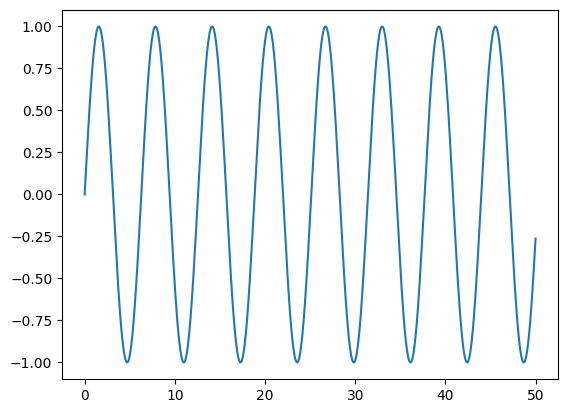

In [9]:

plt.plot(x,y)

In [13]:
#Load the data into pandas dataframe index as x , data as y
df = pd.DataFrame(data=y, index=x, columns=['sine'])
df.head(10)

,sine
0.000000,0.000000
0.065189,0.065143
0.130378,0.130009
0.195567,0.194323
0.260756,0.257811
0.325945,0.320204
0.391134,0.381237
0.456323,0.440651
0.521512,0.498192
0.586701,0.553617


In [14]:
len(df)

768

In [15]:
#testing data precentage 20% 
test_percent = 0.2

In [16]:
#Number of data points reserved for testing the model
len(df)*test_percent

153.60000000000002

In [17]:
#we write this line of code to find the test data length
test_length = np.round(len(df)*test_percent)

In [18]:
test_length

154.0

In [19]:
#the test data starts at this index
test_start_index = int(len(df) - test_length)

In [20]:
test_start_index

614

In [21]:
#create separate training and testing datasets 
#training data includes start to test_start_index
data_train = df.iloc[: test_start_index]
#testing data starts from test_start_index to end of the dataframe
data_train = df.iloc[test_start_index :]

In [22]:
data_train.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


In [23]:
data_train = df.iloc[: test_start_index]
data_train = df.iloc[test_start_index :]
data_test = df.iloc[test_start_index :] 

In [24]:
data_train.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985


In [25]:
data_test.head(5)

,sine
40.026076,0.727471
40.091265,0.681229
40.156454,0.632093
40.221643,0.580271
40.286832,0.525985
